In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('ElectionData.csv')

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [6]:
df.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [8]:
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [9]:
df.shape

(21643, 28)

In [10]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [11]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [12]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.dropna(axis=1)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [15]:
#Outliers

numerical_columns=df.select_dtypes(include=['number'])

In [16]:
numerical_columns

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,38.29,40.22,147993,94,106
1,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,33.28,34.95,128624,81,77
2,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,6.81,7.15,26307,16,19
3,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,4.90,5.14,18923,12,5
4,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.19,0.20,332,0,0
21639,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.18,0.19,326,0,0
21640,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.14,0.15,256,0,0
21641,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.13,0.14,239,0,0


In [17]:
categorical_columns=df.select_dtypes(include=['object'])
categorical_columns

,time,territoryName,Party
0,2019-10-06 20:10:02,Território Nacional,PS
1,2019-10-06 20:10:02,Território Nacional,PPD/PSD
2,2019-10-06 20:10:02,Território Nacional,B.E.
3,2019-10-06 20:10:02,Território Nacional,CDS-PP
4,2019-10-06 20:10:02,Território Nacional,PCP-PEV
...,...,...,...
21638,2019-10-07 00:35:01,Viseu,NC
21639,2019-10-07 00:35:01,Viseu,PNR
21640,2019-10-07 00:35:01,Viseu,MPT
21641,2019-10-07 00:35:01,Viseu,PTP


<Axes: >

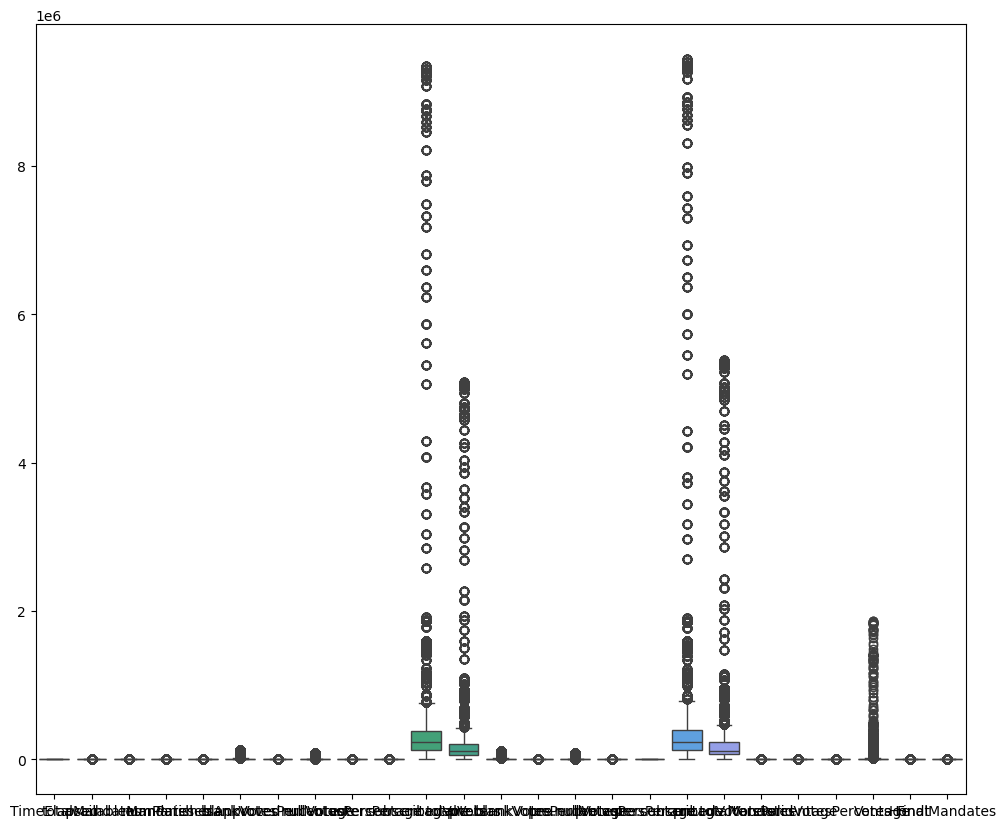

In [18]:
plt.figure(figsize=(12,10))
sns.boxplot(data)

In [19]:
def outliers(df):
    for col in df.select_dtypes(include=['float64','int64']).columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_bound=Q1-(1.5*IQR)
        Upper_bound=Q3+(1.5*IQR)


        df[col]=df[col].apply(lambda x:Lower_bound if x<Lower_bound else Upper_bound if x > Upper_bound else x)

    return df 

In [20]:
df1=outliers(df)

<Axes: >

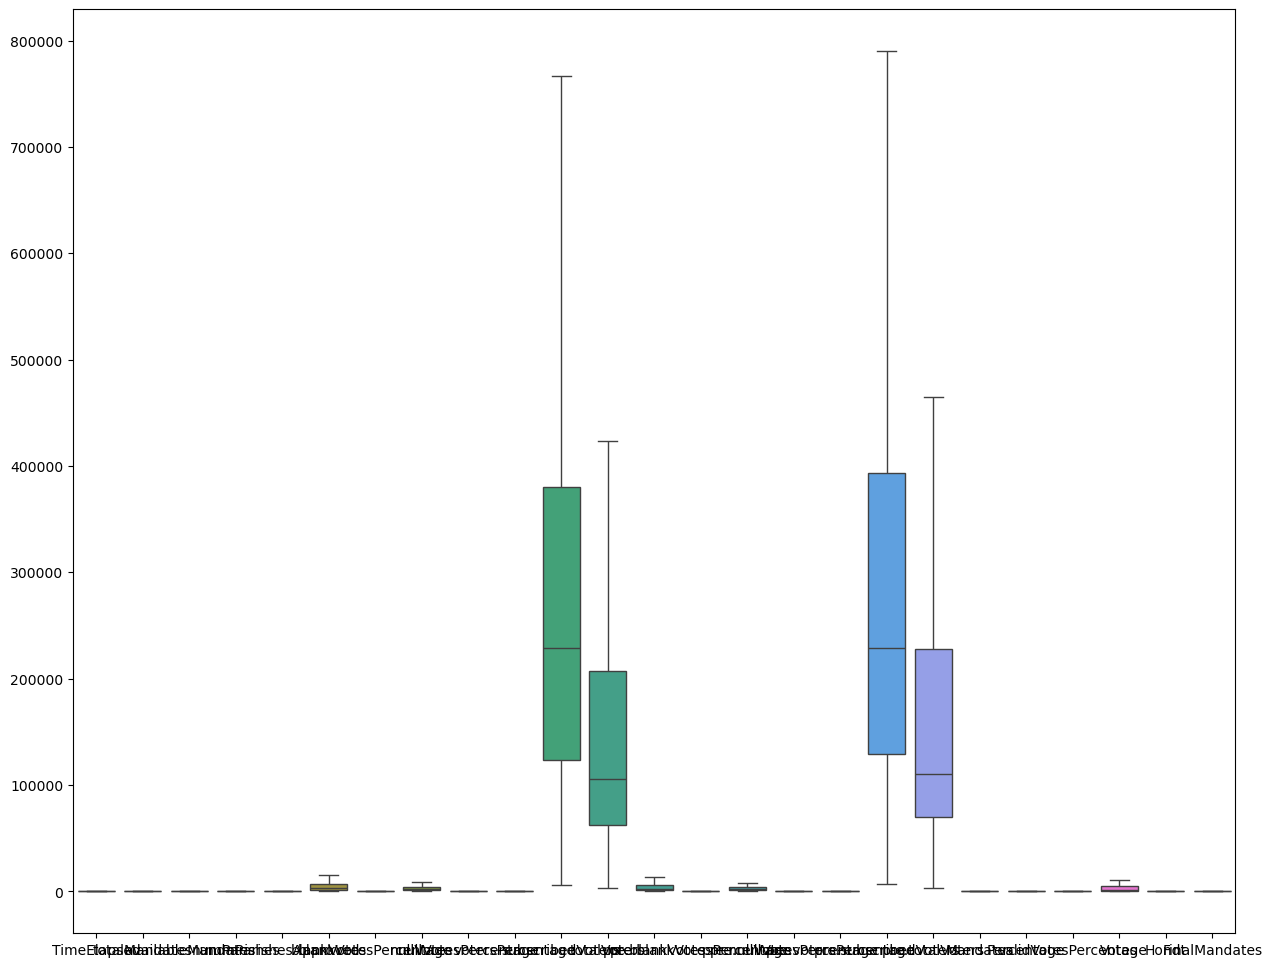

In [21]:
plt.figure(figsize=(15,12))
sns.boxplot(df1)

In [22]:
df1=df1.drop(columns=['time','Party','territoryName','Mandates','Hondt','FinalMandates'])

In [23]:
df1.head()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage,Votes
0,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,7.195,7.555,10921.0
1,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,7.195,7.555,10921.0
2,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,6.810,7.150,10921.0
3,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,4.900,5.140,10921.0
4,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,4.590,4.830,10921.0


In [24]:
pt=PowerTransformer(method='yeo-johnson')

In [25]:
numerical_features=df1.select_dtypes(include=['float64','int64']).columns

In [26]:
df1[numerical_features]=pt.fit_transform(df1[numerical_features])

In [27]:
df1[numerical_features].skew()

TimeElapsed                -0.306219
totalMandates              -0.025199
availableMandates           0.122640
numParishes                 0.005755
numParishesApproved        -0.053527
blankVotes                 -0.071032
blankVotesPercentage        0.020298
nullVotes                  -0.080674
nullVotesPercentage         0.041901
votersPercentage           -0.042573
subscribedVoters           -0.101867
totalVoters                -0.084458
pre.blankVotes             -0.066772
pre.blankVotesPercentage    0.034540
pre.nullVotes              -0.095531
pre.nullVotesPercentage     0.014256
pre.votersPercentage       -0.184101
pre.subscribedVoters       -0.097851
pre.totalVoters            -0.076318
Percentage                  0.378590
validVotesPercentage        0.373076
Votes                      -0.035944
dtype: float64

In [28]:
df2=df1[numerical_features]

In [29]:
correlation=df2.corr()
correlation

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage,Votes
TimeElapsed,1.000000,0.749822,-0.626845,0.001273,0.387991,0.538633,0.051554,0.554941,-0.199807,0.052288,...,0.557561,0.108332,0.573367,-0.090531,0.061075,0.583511,0.579351,0.029081,0.029017,0.380162
totalMandates,0.749822,1.000000,-0.264027,0.290125,0.582905,0.856297,0.125239,0.875597,-0.261310,0.318876,...,0.872799,0.178681,0.882849,-0.204753,0.212050,0.894533,0.890323,0.004637,0.004310,0.526818
availableMandates,-0.626845,-0.264027,1.000000,0.162037,-0.156463,0.027395,0.001134,0.009004,-0.062553,0.255823,...,0.015406,-0.011035,-0.003521,-0.110033,0.203911,-0.012584,-0.001522,-0.024213,-0.024672,-0.031009
numParishes,0.001273,0.290125,0.162037,1.000000,0.825176,0.466706,0.327451,0.441930,0.362678,0.110746,...,0.437714,0.313643,0.376188,0.042485,-0.146604,0.390926,0.373675,-0.070716,-0.068948,0.186187
numParishesApproved,0.387991,0.582905,-0.156463,0.825176,1.000000,0.688522,0.233761,0.697397,0.214170,0.039733,...,0.680910,0.250937,0.658002,0.018030,-0.147325,0.672559,0.655205,-0.043480,-0.042401,0.391411
blankVotes,0.538633,0.856297,0.027395,0.466706,0.688522,1.000000,0.381808,0.958619,-0.174346,0.398694,...,0.996520,0.423201,0.932149,-0.279369,0.279618,0.962679,0.965080,-0.009146,-0.008258,0.556560
blankVotesPercentage,0.051554,0.125239,0.001134,0.327451,0.233761,0.381808,1.000000,0.174820,0.161887,0.025481,...,0.335073,0.965773,0.119249,-0.071278,-0.065960,0.177822,0.167995,-0.012564,-0.007818,0.073904
nullVotes,0.554941,0.875597,0.009004,0.441930,0.697397,0.958619,0.174820,1.000000,-0.090835,0.400110,...,0.971477,0.217198,0.988773,-0.137423,0.244706,0.987510,0.988997,-0.010213,-0.010292,0.572321
nullVotesPercentage,-0.199807,-0.261310,-0.062553,0.362678,0.214170,-0.174346,0.161887,-0.090835,1.000000,-0.214648,...,-0.178846,0.143924,-0.137261,0.665506,-0.349181,-0.211254,-0.218489,-0.024892,-0.022716,-0.126520
votersPercentage,0.052288,0.318876,0.255823,0.110746,0.039733,0.398694,0.025481,0.400110,-0.214648,1.000000,...,0.387145,0.001029,0.354969,-0.426438,0.888275,0.353829,0.406768,-0.023488,-0.024374,0.168028


<Axes: >

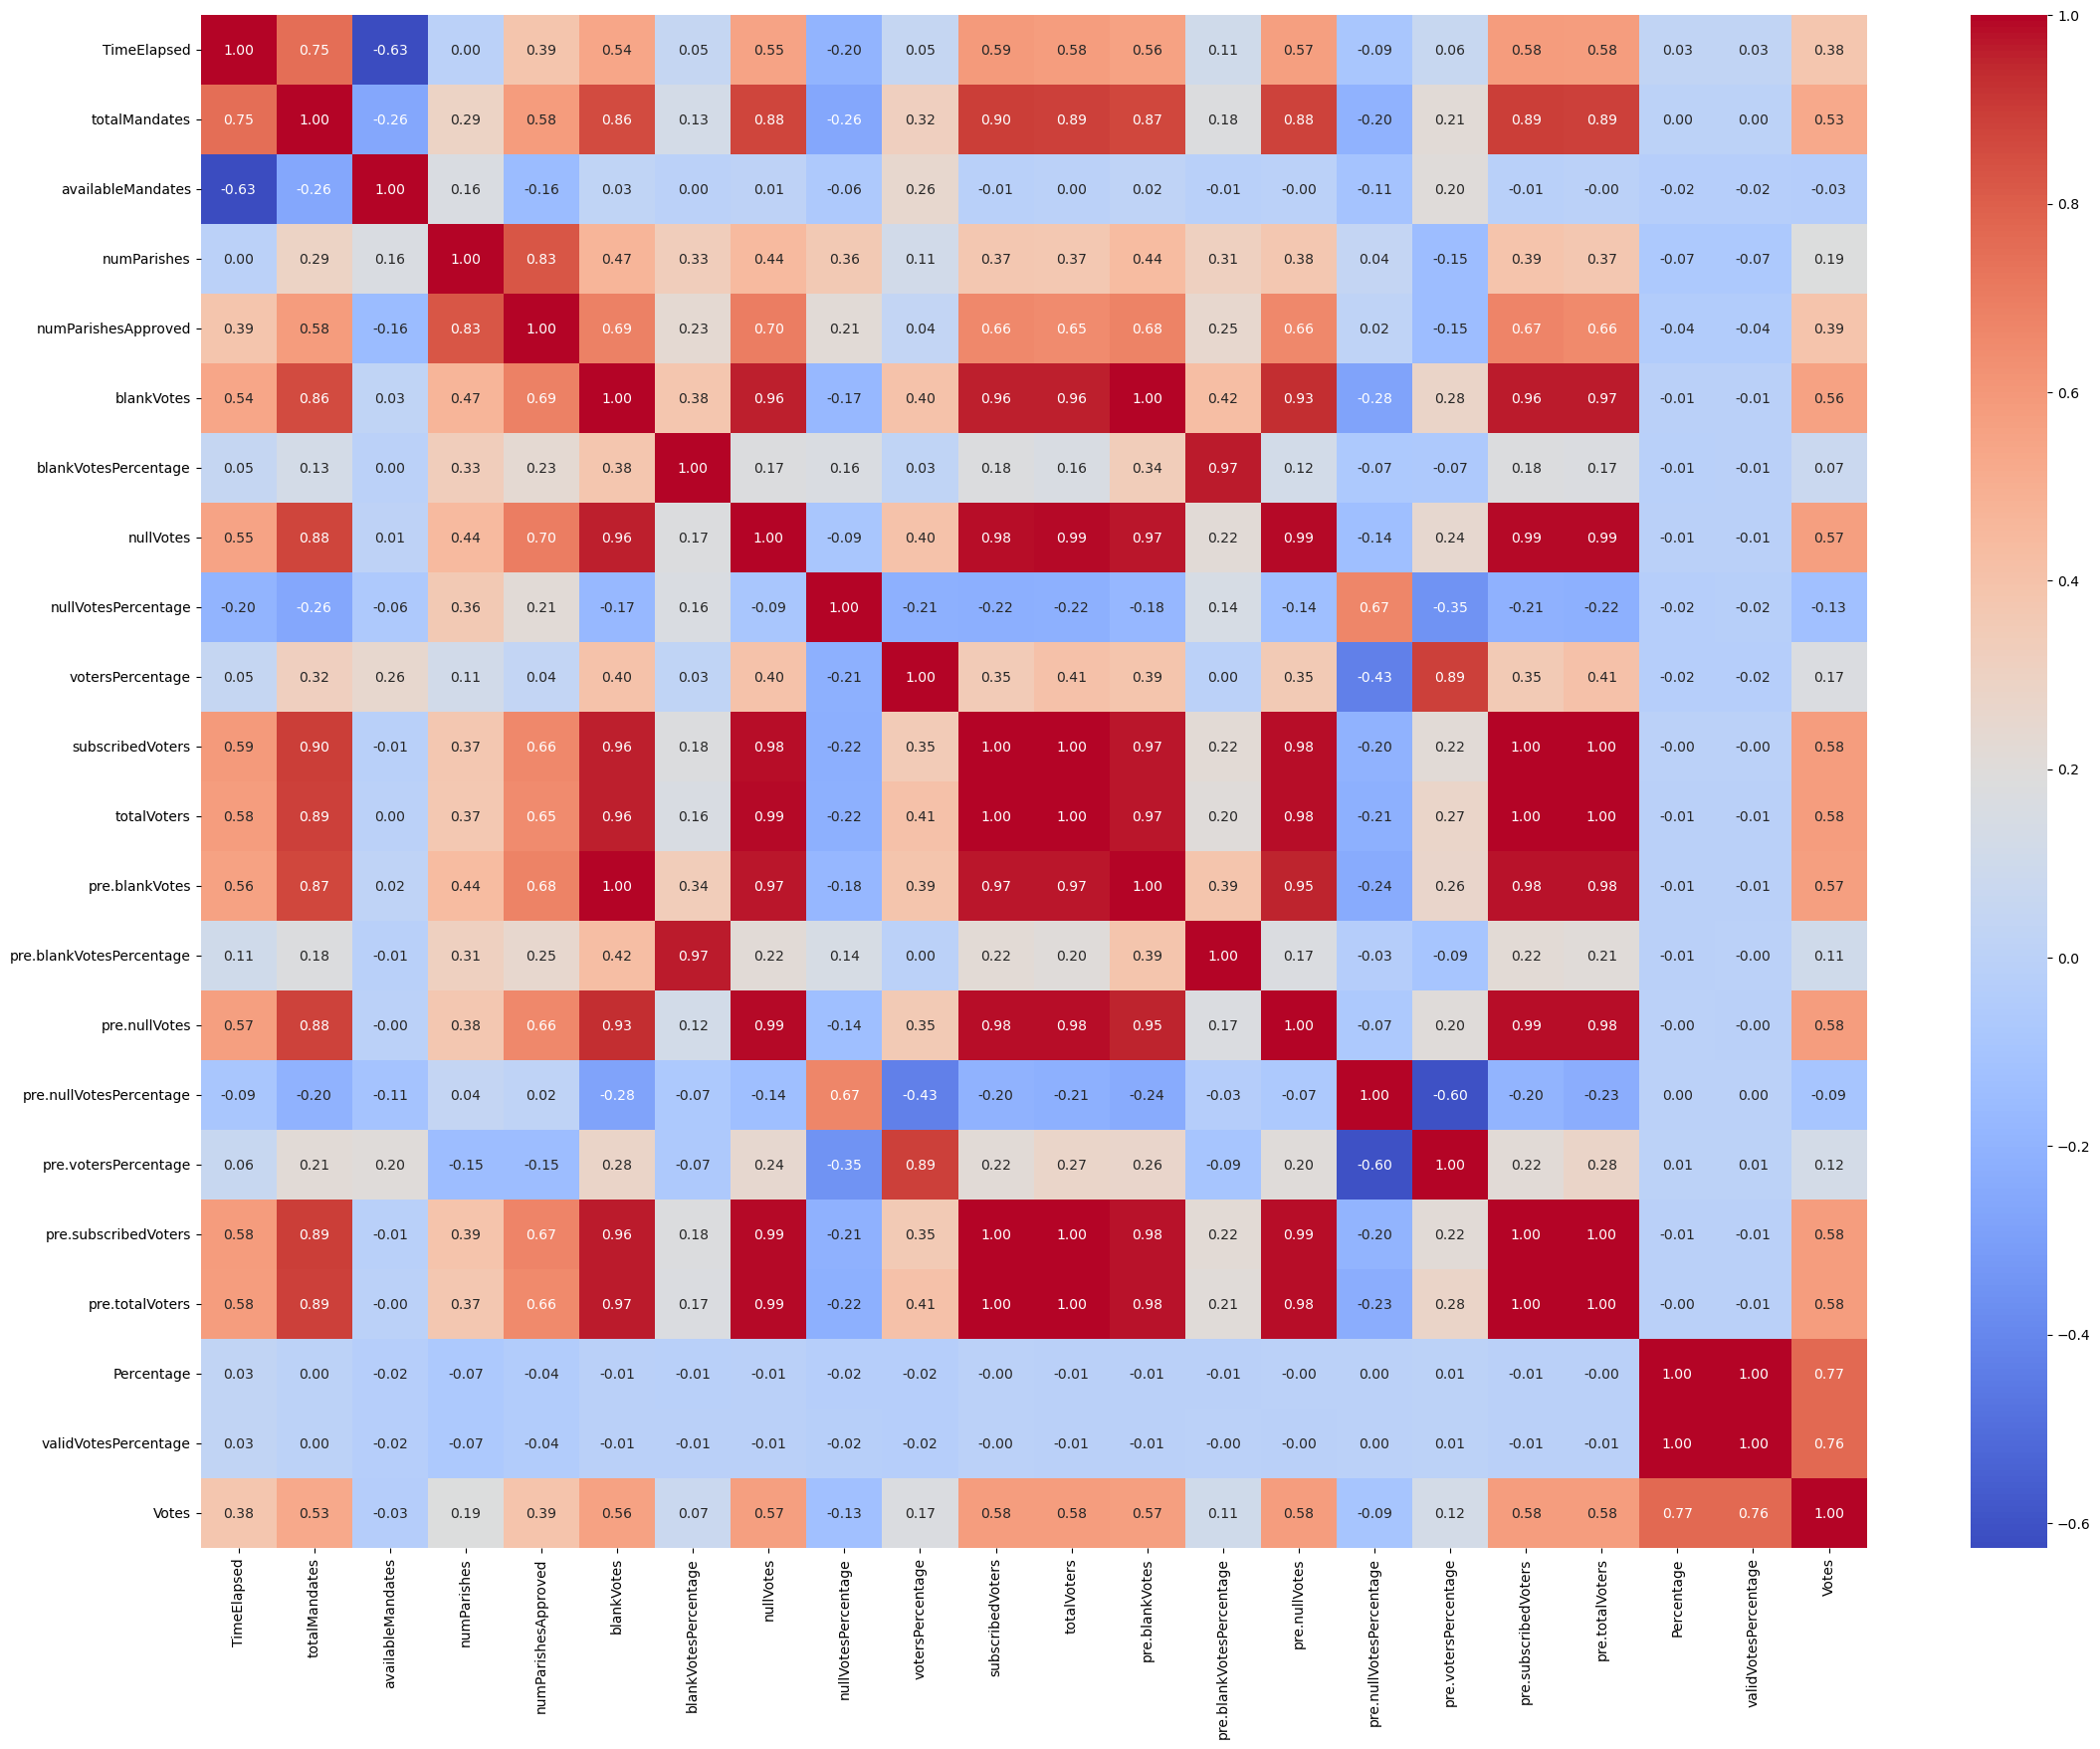

In [30]:
plt.figure(figsize=(27,20))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')

In [31]:
x=df1.drop( 'Votes',axis=1)
y=df1[ 'Votes']


In [32]:
sk=SelectKBest(score_func=f_classif,k=20)
x_num=sk.fit_transform(x,y)

In [33]:
selected_features=x.columns[sk.get_support()]
feature_scores=pd.DataFrame({'feature':x.columns,'score':sk.scores_}).sort_values(by='score',ascending=False)

print("selected features:",selected_features)
print("\nfeature scores:")
print(feature_scores)

selected features: Index(['TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'votersPercentage', 'subscribedVoters', 'totalVoters',
       'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes',
       'pre.nullVotesPercentage', 'pre.votersPercentage',
       'pre.subscribedVoters', 'pre.totalVoters', 'Percentage',
       'validVotesPercentage'],
      dtype='object')

feature scores:
                     feature      score
19                Percentage  46.316244
20      validVotesPercentage  46.165489
10          subscribedVoters  20.736619
17      pre.subscribedVoters  20.612037
18           pre.totalVoters  20.501249
11               totalVoters  20.460640
12            pre.blankVotes  19.890506
14             pre.nullVotes  19.801164
7                  nullVotes  19.544060
5                 blankVotes  19.499464
1              totalMandates  16.817091
0                Tim

In [34]:
x_selected=x[selected_features]

In [35]:
x_selected.columns

Index(['TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'votersPercentage', 'subscribedVoters', 'totalVoters',
       'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes',
       'pre.nullVotesPercentage', 'pre.votersPercentage',
       'pre.subscribedVoters', 'pre.totalVoters', 'Percentage',
       'validVotesPercentage'],
      dtype='object')

In [36]:
scaler=StandardScaler()

In [37]:
x_scaled=scaler.fit_transform(x_selected)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [39]:
print(f"""
x train shape:{x_train.shape}
x test shape:{x_test.shape}
y train shape:{y_train.shape}
y test shape:{y_test.shape}
""")


x train shape:(17314, 20)
x test shape:(4329, 20)
y train shape:(17314,)
y test shape:(4329,)

